## **PGA PLAYERS BY RACE (BY HOME COUNTRY CLASSIFICATION)** <a id="1"></a>

<a><img style="float: right;" src="https://www.linkpicture.com/q/images2_4.jpg" width="300" /></a>
<a><img style="float: right;" src="https://www.linkpicture.com/q/images_539.png" width="300" /></a>
 



- Dataset source: https://github.com/daronprater/PGA-Tour-Data-Science-Project/blob/master/pgatour_cleaned.csv

### Notebook Preparation <a id="1.2"></a>

This part of the notebook deals with the relevant library import and visual configuration.

In [123]:
# Import libraries

import pandas as pd
import numpy as np 
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_samples, silhouette_score

In [124]:
# Set notebook options

pd.options.display.max_columns = 30

import warnings
warnings.filterwarnings("ignore")

## **Data Preparation** <a id="2"></a>

The below section provides an initial exploration of the data.

In [125]:
# Create URL
url = 'pga_players_race.json'
# Load data
df = pd.read_json(url)
# View the first five rows
df.head(5)

,null,name,rounds,scoring,drive_distance,fwy_,gir_,sg_p,sg_ttg,sg_t,points,top_10,1st,year,money,country
0,0,Aaron Baddeley,83,70.088,291.9,60.00,60.35,0.629,0.435,1.064,17703,7,1,2007,3441119,AUS
1,1,Adam Scott,69,70.008,300.9,59.17,65.44,0.129,1.105,1.234,15630,6,1,2007,3413185,AUS
2,2,Alex Cejka,80,70.437,288.9,68.08,69.44,-0.479,1.207,0.728,2400,4,0,2007,868303,GER
3,3,Anders Hansen,55,70.856,280.7,66.95,62.85,-0.176,0.087,-0.089,1989,0,0,2007,461216,DEN
4,4,Andrew Buckle,77,71.443,294.7,58.14,62.52,0.161,-0.426,-0.265,1875,1,0,2007,513630,AUS


In [126]:
# Let us count the number of records in the dataset.

df.shape

(2044, 16)

- There are 2,044 rows and 16 columns in the dataset.

In [127]:
# Check data types and if any records are missing

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044 entries, 0 to 2043
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   null            2044 non-null   int64  
 1   name            2044 non-null   object 
 2   rounds          2044 non-null   int64  
 3   scoring         2044 non-null   float64
 4   drive_distance  2044 non-null   float64
 5   fwy_            2044 non-null   float64
 6   gir_            2044 non-null   float64
 7   sg_p            2044 non-null   float64
 8   sg_ttg          2044 non-null   float64
 9   sg_t            2044 non-null   float64
 10  points          2044 non-null   int64  
 11  top_10          2044 non-null   int64  
 12  1st             2044 non-null   int64  
 13  year            2044 non-null   int64  
 14  money           2044 non-null   int64  
 15  country         2044 non-null   object 
dtypes: float64(7), int64(7), object(2)
memory usage: 255.6+ KB


- Seems we have no missing records in our datasets.
- Let us confirm again that we have no missing record.

In [128]:
# Let us count the number of missing records in each column of our dataset.

df.isnull().sum()

null              0
name              0
rounds            0
scoring           0
drive_distance    0
fwy_              0
gir_              0
sg_p              0
sg_ttg            0
sg_t              0
points            0
top_10            0
1st               0
year              0
money             0
country           0
dtype: int64

- Great! No missing record. Our dataset is clean, we can proceed with our data analysis.

In [40]:
df.shape

(2044, 16)

In [44]:
# Let us view some basic statistical information about our dataset.
# Only numerical columns will generate statistical information.

df.describe()

,null,rounds,scoring,drive_distance,fwy_,gir_,sg_p,sg_ttg,sg_t,points,top_10,1st,year,money
count,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2.044000e+03
mean,1021.500000,79.355186,70.912630,289.540068,62.036404,65.412480,0.022556,0.129178,0.151788,1790.963796,2.675147,0.234344,2011.949119,1.419303e+06
std,590.196295,14.604295,0.681575,8.710074,5.209013,2.650798,0.351150,0.621524,0.675791,3833.522276,2.411051,0.593136,3.185158,1.325270e+06
min,0.000000,45.000000,67.794000,259.000000,41.860000,54.230000,-1.475000,-3.340000,-3.209000,6.000000,0.000000,0.000000,2007.000000,4.546000e+04
25%,510.750000,69.000000,70.490500,283.600000,58.510000,63.640000,-0.194000,-0.259500,-0.262500,360.000000,1.000000,0.000000,2009.000000,5.564188e+05
50%,1021.500000,80.000000,70.899000,289.300000,62.040000,65.560000,0.036000,0.140500,0.157500,659.000000,2.000000,0.000000,2012.000000,1.016720e+06
75%,1532.250000,90.000000,71.338750,295.200000,65.605000,67.122500,0.261000,0.528000,0.564250,1272.000000,4.000000,0.000000,2015.000000,1.809302e+06
max,2043.000000,124.000000,74.262000,318.400000,80.420000,73.520000,1.130000,2.380000,3.189000,53607.000000,15.000000,7.000000,2017.000000,1.203046e+07


- From the statistical table above:

- Average point = 1790.96
- Minimum point = 6
- Maximum point = 53607

## HomeCountry Exploration <a id="3"></a>

In [46]:
# import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [122]:
# Let us count the number of unique countries and the respective number of PGA players.

df['country'].value_counts(ascending=True)

TPE       1
BEL       1
NOR       1
PAR       1
DEN       2
BRA       2
WAL       2
ITA       3
MEX       4
IND       5
VEN       6
ZIM       9
GER      10
FIJ      10
NIR      12
IRL      12
COL      12
NZL      14
SCO      15
JPN      18
ESP      18
ARG      28
CAN      42
KOR      53
SWE      54
ENG      59
RSA      72
AUS     173
USA    1405
Name: country, dtype: int64

- There are 29 unique countries
- Let us again count the number of unique countries in the dataset using 'groupby' method.

In [121]:
# Grouping by country and count the number of unique countries. 

df.groupby(['country']).count()

,null,name,rounds,scoring,drive_distance,fwy_,gir_,sg_p,sg_ttg,sg_t,points,top_10,1st,year,money
country,,,,,,,,,,,,,,,
ARG,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
AUS,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173
BEL,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
BRA,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
CAN,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
COL,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
DEN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
ENG,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
ESP,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18


- There are 29 unique Countries in our dataset. 

- Group 1 = Argentina.
- Group 2 = Australia.
- Group 3 = Belgium. 
- Group 4 = Brazil.
- Group 5 = Canada.
- Group 6 = Colombia.
- Group 7 = Denmark.
- Group 8 = England.
- Group 9 = Spain.
- Group 10 = Fiji.
- Group 11 = Germany.
- Group 12 = Indonesia.
- Group 13 = Ireland.
- Group 14 = Italy.
- Group 15 = Japan.
- Group 16 = Korea.
- Group 17 = Mexico.
- Group 18 = Niger.
- Group 19 = Norway.
- Group 20 = New Zealand.
- Group 21 = Paraguay.
- Group 22 = Republic of South Africa.
- Group 23 = Scotland.
- Group 24 = Sweden.
- Group 25 = Taiwan.
- Group 26 = USA.
- Group 27 = Venezuela.
- Group 28 = Wales.
- Group 29 = Zimbabwe.

In [61]:
 # Counting number of PGA players whose Home Country = Argentina

arg = (df['country']=='ARG').sum()
arg

28

In [66]:
 # Counting number of PGA players whose Home Country = Australia

aus = (df['country']=='AUS').sum()
aus

173

In [67]:
 # Counting number of PGA players whose Home Country = Belgium

bel = (df['country']=='BEL').sum()
bel

1

In [68]:
 # Counting number of PGA players whose Home Country = Brazil

bra = (df['country']=='BRA').sum()
bra

2

In [69]:
 # Counting number of PGA players whose Home Country = Canada

can = (df['country']=='CAN').sum()
can

42

In [70]:
 # Counting number of PGA players whose Home Country = Colombia

col = (df['country']=='COL').sum()
col

12

In [72]:
 # Counting number of PGA players whose Home Country = Denmark

den = (df['country']=='DEN').sum()
den

2

In [73]:
 # Counting number of PGA players whose Home Country = England

eng = (df['country']=='ENG').sum()
eng

59

In [74]:
 # Counting number of PGA players whose Home Country = Spain

esp = (df['country']=='ESP').sum()
esp

18

In [75]:
 # Counting number of PGA players whose Home Country = Fiji

fij = (df['country']=='FIJ').sum()
fij

10

In [76]:
 # Counting number of PGA players whose Home Country = Germany

ger = (df['country']=='GER').sum()
ger

10

In [77]:
 # Counting number of PGA players whose Home Country = Indonesia

ind = (df['country']=='IND').sum()
ind

5

In [78]:
 # Counting number of PGA players whose Home Country = Ireland

irl = (df['country']=='IRL').sum()
irl

12

In [79]:
 # Counting number of PGA players whose Home Country = Italy

ita = (df['country']=='ITA').sum()
ita

3

In [83]:
 # Counting number of PGA players whose Home Country = Japan

jpn = (df['country']=='JPN').sum()
jpn

18

In [84]:
 # Counting number of PGA players whose Home Country = Korea

kor = (df['country']=='KOR').sum()
kor

53

In [85]:
 # Counting number of PGA players whose Home Country = Mexico

mex = (df['country']=='MEX').sum()
mex

4

In [87]:
 # Counting number of PGA players whose Home Country = Niger

nir = (df['country']=='NIR').sum()
nir

12

In [88]:
 # Counting number of PGA players whose Home Country = Norway

nor = (df['country']=='NOR').sum()
nor

1

In [89]:
 # Counting number of PGA players whose Home Country = New Zealand

nzl = (df['country']=='NZL').sum()
nzl

14

In [90]:
 # Counting number of PGA players whose Home Country = Paraguay

par = (df['country']=='PAR').sum()
par

1

In [91]:
 # Counting number of PGA players whose Home Country = Republic of South Africa

rsa = (df['country']=='RSA').sum()
rsa

72

In [92]:
 # Counting number of PGA players whose Home Country = Scotland

sco = (df['country']=='SCO').sum()
sco

15

In [94]:
 # Counting number of PGA players whose Home Country = Sweden

swe = (df['country']=='SWE').sum()
swe

54

In [95]:
 # Counting number of PGA players whose Home Country = Taiwan

tpe = (df['country']=='TPE').sum()
tpe

1

In [96]:
 # Counting number of PGA players whose Home Country = USA

usa = (df['country']=='USA').sum()
usa

1405

In [97]:
 # Counting number of PGA players whose Home Country = Venezuela

ven = (df['country']=='VEN').sum()
ven

6

In [98]:
 # Counting number of PGA players whose Home Country = Wales

wal = (df['country']=='WAL').sum()
wal

2

In [103]:
 # Counting number of PGA players whose Home Country = Zimbabwe

zim = (df['country']=='ZIM').sum()
zim

9

In [104]:
# Create a DataFrame based on the home country groupings created above
dataframe = pd.DataFrame()

# Add columns
dataframe['country'] = ['Argentina', 'Australia', 'Belgium', 'Brazil', 'Canada', 'Colombia', 'Denmark', 'England', 'Spain', 'Fiji', 'Germany', 'Indonesia', 'Ireland', 'Italy', 'Japan', 'Korea', 'Mexico', 'Niger', 'Norway', 'New Zealand', 'Paraguay', 'South Africa', 'Scotland', 'Sweden', 'Taiwan', 'USA', 'Venezuela', 'Wales', 'Zimbabwe']
dataframe['Number of PGA Players'] = [arg, aus, bel, bra, can, col, den, eng, esp, fij, ger, ind, irl, ita, jpn, kor, mex, nir, nor, nzl, par, rsa, sco, swe, tpe, usa, ven, wal, zim]

# Show DataFrame
dataframe

,country,Number of PGA Players
0,Argentina,28
1,Australia,173
2,Belgium,1
3,Brazil,2
4,Canada,42
5,Colombia,12
6,Denmark,2
7,England,59
8,Spain,18
9,Fiji,10


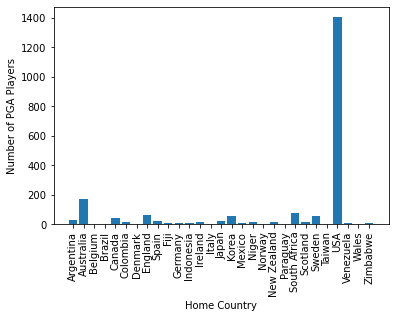

In [120]:
# Let us visualize the bar chart of PGA players and their Home Countries.

x = dataframe["country"]
y = dataframe["Number of PGA Players"]
plt.bar(x,y,align='center') # A bar chart
plt.xticks(rotation = 90)
plt.xlabel('Home Country')
plt.ylabel('Number of PGA Players')
plt.show()

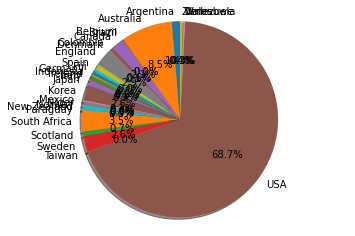

<Figure size 1440x1080 with 0 Axes>

In [118]:
# Let us plot pie chart
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = x = dataframe["country"]
data = dataframe["Number of PGA Players"]


fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
fig = plt.figure(figsize =(20, 15))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

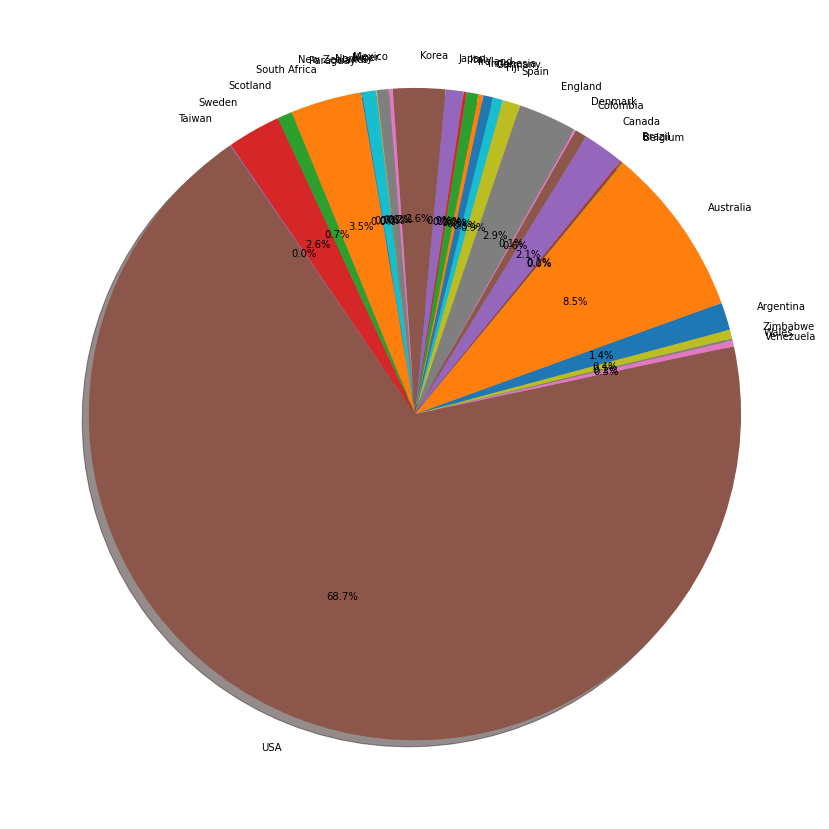

In [119]:
# Import libraries
# Let us plot a bigger view of pie chart for proper visibility

from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset
countries = x = dataframe["country"]
 
data = dataframe["Number of PGA Players"]
 
# Creating plot
fig = plt.figure(figsize =(100, 15))
plt.pie(data, labels = countries, autopct='%1.1f%%', startangle=15, shadow=True)
 
# show plot
plt.show()

## **5. Conclusion** <a id="5"></a>


### With a total of 2,044 PGA players in our dataset, the following table shows the percentages of PGA players based on their various home country groupings.

- PGA players from ARGENTINA represent 1.40% of the dataset.
- PGA players from AUSTRALIA represent 8.50% of the dataset.
- PGA players from BELGIUM represent 0.05% of the dataset.
- PGA players from BRAZIL represent 0.10% of the dataset.
- PGA players from CANADA represent 2.05% of the dataset.
- PGA players from COLOMBIA represent 0.59% of the dataset.
- PGA players from DENMARK represent 0.10% of the dataset.
- PGA players from ENGLAND represent 2.88% of the dataset.
- PGA players from SPAIN represent 0.88% of the dataset.
- PGA players from FIJI represent 0.49% of the dataset.
- PGA players from GERMANY represent 0.49% of the dataset.
- PGA players from INDONESIA represent 0.24% of the dataset.
- PGA players from IRELAND represent 0.59% of the dataset.
- PGA players from ITALY represent 0.14% of the dataset.
- PGA players from JAPAN represent 0.88% of the dataset.
- PGA players from KOREA represent 2.59% of the dataset.
- PGA players from MEXICO represent 0.19% of the dataset.
- PGA players from NIGER represent 0.59% of the dataset.
- PGA players from NORWAY represent 0.05% of the dataset.
- PGA players from NEW ZEALAND represent 0.68% of the dataset.
- PGA players from PARAGUAY represent 0.05% of the dataset.
- PGA players from SOUTH AFRICA represent 3.52% of the dataset.
- PGA players from SCOTLAND represent 0.73% of the dataset.
- PGA players from SWEDEN represent 2.64% of the dataset.
- PGA players from TAIWAN represent 0.05% of the dataset.
- PGA players from USA represent 68.74% of the dataset.
- PGA players from VENEZUELA represent 0.29% of the dataset.
- PGA players from WALES represent 0.10% of the dataset.
- PGA players from ZIMBABWE represent 0.44% of the dataset.